In [236]:
import pandas as pd 
import seaborn as sns
import matplotlib as mp
import numpy as np
import re
import math 
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### LOADING THE DATA 

In [237]:
data = pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\az_tweets.csv') #Importing data
data.head()

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,DIGITAL News UK,@DigitalNewsUK,2021-04-15T21:14:02.000Z,Scotland's First Minister Nicola Sturgeon said...,NaN,1.0,9,3
1,"Zeina Moukarzel, MD,MPH,MHA #Vaccinated",@lamsalebanon1,2021-04-12T10:54:48.000Z,The risk of serious side-effects from the #Ast...,NaN,83.0,103,5
2,LizDavies #IndyWales,@LizDavies14,2021-04-15T14:10:51.000Z,COVID-19: Risk of blood clot after coronavirus...,NaN,1.0,1,5
3,RiverRising,@The12fthOfNever,2021-04-15T00:53:26.000Z,People aged under 60 who have been given a fir...,NaN,36.0,8,848
4,Beth Levy,@Beth_Levy66,2021-04-15T18:10:54.000Z,If the majority of the vaccines in freezers ar...,NaN,1.0,256,10


In [238]:
len(data) # Number of ROWS

1033

### DATA PREPROCESSING 

In [239]:
# Text Clean 
def textclean(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) # @mentions are deleted 
    text=re.sub(r'#','',text) # hashtags are deleted 
    text=re.sub(r'(Astrazeneca|Astra Zeneca)','',text) #astrazeneca is removed from all tweets
    text=re.sub(r'(COVID|Covid)','',text) #astrazeneca is removed from all tweets
    text=re.sub(r'(COVID19|vaccine)','',text) #astrazeneca is removed from all tweets
    text=re.sub(r'(AstraZeneca|astrazeneca)','',text) #astrazeneca is removed from all tweets
    text=re.sub(r'(Pfizer|risk)','',text) #astrazeneca is removed from all tweets
    text=re.sub(r'https?:\/\/\S+','',text) #remove links
    text=re.sub(r'(\n)','',text) #remove \n
   

    
    return text

data['Text']=data['Text'].apply(textclean)


In [240]:
dup=data['Text'].duplicated()

In [241]:
t_val=0
f_val=0
for i in dup:
    if i==False:
        f_val=f_val+1
    else:
        t_val=t_val+1
print("False values:", f_val,"\n","True values:",t_val)

False values: 985 
 True values: 48


In [242]:
data=data.drop_duplicates(['Text'], keep='last')

In [243]:
# Converting "Likes" into numerical values: 
data['Likes']=data["Likes"].fillna(0)

In [244]:
data['Likes']

0          9
1        103
2          1
3          8
4        256
5          1
7       5.8K
8          2
9          6
10       235
11        24
12         1
13         8
14         5
15       838
16       893
17       894
18       202
19        26
20       672
21       102
22       191
23        58
24        72
25       259
27       175
28       102
29       111
30       874
31       311
        ... 
1003       0
1004       0
1005       0
1006       0
1007       0
1008       0
1009       0
1010       0
1011       0
1012       0
1013       0
1014       0
1015       0
1016       0
1017       0
1018       0
1019       0
1020       0
1021       0
1022       0
1023       0
1024       0
1025       0
1026       0
1027       0
1028       0
1029       0
1030       0
1031       0
1032       0
Name: Likes, Length: 985, dtype: object

In [245]:
for i in data['Likes']:        
    if type(i)== str:
        if i[-1]=='K':
            j=(int(float(i[:-1])*1000))
            data.replace(i,j,inplace=True)
        else:
            j=(int(i))
            data.replace(i,j,inplace=True)
 

In [246]:
data.reset_index(inplace = True, drop = True)

In [247]:
data2=data

# MODEL 1 (Using Textblob Subjectivity/Polarity)

In [248]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


data['Subjectivity']=data['Text'].apply(getSubjectivity)
data['Polarity']=data['Text'].apply(getPolarity)
data

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,Subjectivity,Polarity
0,DIGITAL News UK,@DigitalNewsUK,2021-04-15T21:14:02.000Z,Scotland's First Minister Nicola Sturgeon said...,NaN,1.0,9,3,0.438889,0.166667
1,"Zeina Moukarzel, MD,MPH,MHA #Vaccinated",@lamsalebanon1,2021-04-12T10:54:48.000Z,The of serious side-effects from the v/s ot...,NaN,83.0,103,5,0.520833,-0.229167
2,LizDavies #IndyWales,@LizDavies14,2021-04-15T14:10:51.000Z,-19: Risk of blood clot after coronavirus is e...,NaN,1.0,1,5,0.500000,0.250000
3,RiverRising,@The12fthOfNever,2021-04-15T00:53:26.000Z,People aged under 60 who have been given a fir...,NaN,36.0,8,848,0.333333,0.037500
4,Beth Levy,@Beth_Levy66,2021-04-15T18:10:54.000Z,"If the majority of the s in freezers are , why...",NaN,1.0,256,10,0.000000,0.000000
5,Century,@8Bigmoney,2021-04-15T23:21:09.000Z,When you learn that the has a bit of covid i...,NaN,1.0,1,32,0.000000,0.000000
6,The Guardian,@guardian,2021-04-15T04:22:35.000Z,Oxford/ research ‘was 97% publicly funded’Ox...,NaN,6.0,5800,21,0.144444,0.033333
7,Catherine Backman,@cath_back,2021-04-16T02:36:43.000Z,My arm’s a little sore today. Because yesterda...,NaN,137.0,2,9,0.473333,0.122500
8,chris keefer,@Dr_Keefer,2021-04-15T15:46:13.000Z,Relative of blood clots with v OCP v being a...,NaN,2.0,6,9,0.000000,0.000000
9,Charlotte Westwood,@charlmarx89,2021-04-15T18:08:56.000Z,2nd jab today No side effects and no sudden ...,NaN,11.0,235,10,0.166667,0.000000


###  Analysis and Visualization:

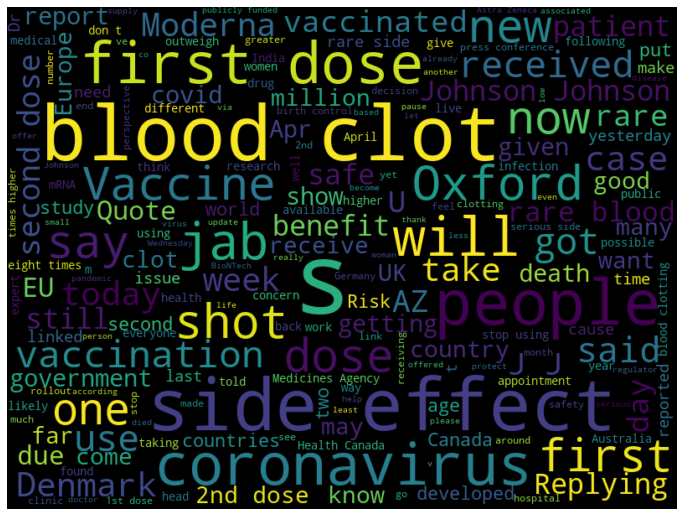

In [249]:
from matplotlib.pyplot import figure
figure( figsize=(12, 10))
words= ''.join( i for i in data['Text'])
wordcloud = WordCloud(height=600,width=800,random_state=21,max_font_size=119).generate(words)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [250]:
def sentiment(score):
    if score > 0:
        return "POSITIVE"
    elif score < 0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"
data['Sentiment']=data['Polarity'].apply(sentiment)
data

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,Subjectivity,Polarity,Sentiment
0,DIGITAL News UK,@DigitalNewsUK,2021-04-15T21:14:02.000Z,Scotland's First Minister Nicola Sturgeon said...,NaN,1.0,9,3,0.438889,0.166667,POSITIVE
1,"Zeina Moukarzel, MD,MPH,MHA #Vaccinated",@lamsalebanon1,2021-04-12T10:54:48.000Z,The of serious side-effects from the v/s ot...,NaN,83.0,103,5,0.520833,-0.229167,NEGATIVE
2,LizDavies #IndyWales,@LizDavies14,2021-04-15T14:10:51.000Z,-19: Risk of blood clot after coronavirus is e...,NaN,1.0,1,5,0.500000,0.250000,POSITIVE
3,RiverRising,@The12fthOfNever,2021-04-15T00:53:26.000Z,People aged under 60 who have been given a fir...,NaN,36.0,8,848,0.333333,0.037500,POSITIVE
4,Beth Levy,@Beth_Levy66,2021-04-15T18:10:54.000Z,"If the majority of the s in freezers are , why...",NaN,1.0,256,10,0.000000,0.000000,NEUTRAL
5,Century,@8Bigmoney,2021-04-15T23:21:09.000Z,When you learn that the has a bit of covid i...,NaN,1.0,1,32,0.000000,0.000000,NEUTRAL
6,The Guardian,@guardian,2021-04-15T04:22:35.000Z,Oxford/ research ‘was 97% publicly funded’Ox...,NaN,6.0,5800,21,0.144444,0.033333,POSITIVE
7,Catherine Backman,@cath_back,2021-04-16T02:36:43.000Z,My arm’s a little sore today. Because yesterda...,NaN,137.0,2,9,0.473333,0.122500,POSITIVE
8,chris keefer,@Dr_Keefer,2021-04-15T15:46:13.000Z,Relative of blood clots with v OCP v being a...,NaN,2.0,6,9,0.000000,0.000000,NEUTRAL
9,Charlotte Westwood,@charlmarx89,2021-04-15T18:08:56.000Z,2nd jab today No side effects and no sudden ...,NaN,11.0,235,10,0.166667,0.000000,NEUTRAL


In [251]:
def score(likes):
    return 1 + likes

data['Score']=data['Likes'].apply(score)


In [252]:
p=n=nt=0
for i in data['Sentiment']:
    if i=="POSITIVE":
        p=p+1
    elif i=="NEGATIVE":
        n=n+1
    else:
        nt=nt+1
print("Positive",p,"Negative",n,"Neutral",nt)    

Positive 619 Negative 171 Neutral 195


In [253]:
print("Satisfied with the astrazeneca:",round((p/len(data))*100,2))
print("Unsatisfied with the astrazeneca:",round((n/len(data))*100,2))
print("Indifferent to astrazeneca:",round((nt/len(data))*100,2))


Satisfied with the astrazeneca: 62.84
Unsatisfied with the astrazeneca: 17.36
Indifferent to astrazeneca: 19.8


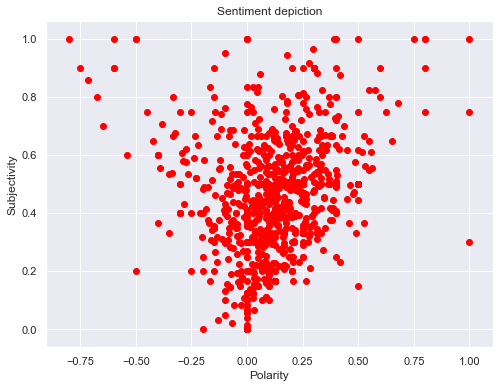

In [254]:
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data['Polarity'][i],data['Subjectivity'][i],color= 'Red')
plt.title('Sentiment depiction')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

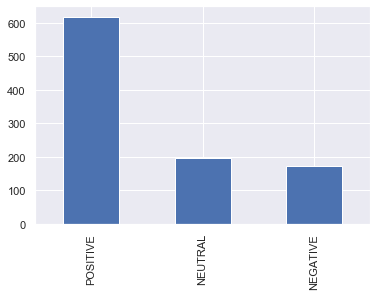

In [255]:
data['Sentiment'].value_counts().plot(kind='bar')

#### So the general feeling of people about astrazeneca is positive with 61 percent in favour of it. 
#### Around  1/5th of the people are usure about astrazeneca.


 

# 

# 

# 

## MODEL 2 (Using NLTK package )

In [256]:
import nltk
from pprint import pprint
from nltk import word_tokenize

In [257]:
stopwords = nltk.corpus.stopwords.words("english")
words= ''.join( i for i in data2['Text'])

tokens = word_tokenize(words)

In [258]:
tokens=[w.lower() for w in tokens]
words=[w for w in tokens if w not in stopwords]
words=[w for w in words if w.isalpha()]
words

['scotland',
 'first',
 'minister',
 'nicola',
 'sturgeon',
 'said',
 'receiving',
 'first',
 'dose',
 'vaccinethe',
 'serious',
 'risk',
 'blood',
 'clot',
 'coronavirus',
 'eight',
 'times',
 'higher',
 'studypeople',
 'aged',
 'given',
 'first',
 'dose',
 'coronavirus',
 'germany',
 'receive',
 'different',
 'jab',
 'second',
 'dose',
 'federal',
 'regional',
 'health',
 'ministers',
 'agreedif',
 'majority',
 'freezers',
 'people',
 'get',
 'appointments',
 'pharmacies',
 'onpoli',
 'make',
 'make',
 'sensewhen',
 'learn',
 'bit',
 'covid',
 'research',
 'publicly',
 'funded',
 'research',
 'publicly',
 'funded',
 'analysis',
 'rebuts',
 'claim',
 'boris',
 'johnson',
 'jab',
 'developed',
 'greed',
 'arm',
 'little',
 'sore',
 'today',
 'yesterday',
 'jabbed',
 'first',
 'dose',
 'said',
 'yes',
 'first',
 'offer',
 'thanks',
 'benefits',
 'far',
 'outweigh',
 'blood',
 'clots',
 'v',
 'ocp',
 'v',
 'canadian',
 'v',
 'relative',
 'jab',
 'today',
 'side',
 'effects',
 'sudden',
 

In [274]:
print("THE MAIN KEYWORDS USED WHEN PEOPLE TALK ABOUT ASTRAZENECA:\n")
fd = nltk.FreqDist(words)
fd.tabulate(10)
    

THE MAIN KEYWORDS USED WHEN PEOPLE TALK ABOUT ASTRAZENECA:

      blood        dose       first        side       clots      people     effects coronavirus        rare         get 
        289         277         249         206         184         165         165         146         134         133 


### Sentiment

In [260]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [261]:
def sentimentscore(text):
    return sia.polarity_scores(text)["compound"]
def sentiment(score):
    if score>0:
        return "POSITIVE"
    elif score<0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"
data2['Sentiment Score']=data2['Text'].apply(sentimentscore)
data2['Sentiment']=data2['Sentiment Score'].apply(sentiment)   


In [262]:
data.head(5)

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,Subjectivity,Polarity,Sentiment,Score,Sentiment Score
0,DIGITAL News UK,@DigitalNewsUK,2021-04-15T21:14:02.000Z,Scotland's First Minister Nicola Sturgeon said...,NaN,1.0,9,3,0.438889,0.166667,NEUTRAL,10,0.0000
1,"Zeina Moukarzel, MD,MPH,MHA #Vaccinated",@lamsalebanon1,2021-04-12T10:54:48.000Z,The of serious side-effects from the v/s ot...,NaN,83.0,103,5,0.520833,-0.229167,NEGATIVE,104,-0.0772
2,LizDavies #IndyWales,@LizDavies14,2021-04-15T14:10:51.000Z,-19: Risk of blood clot after coronavirus is e...,NaN,1.0,1,5,0.500000,0.250000,NEGATIVE,2,-0.2732
3,RiverRising,@The12fthOfNever,2021-04-15T00:53:26.000Z,People aged under 60 who have been given a fir...,NaN,36.0,8,848,0.333333,0.037500,POSITIVE,9,0.2732
4,Beth Levy,@Beth_Levy66,2021-04-15T18:10:54.000Z,"If the majority of the s in freezers are , why...",NaN,1.0,256,10,0.000000,0.000000,NEGATIVE,257,-0.1179


In [263]:
p=n=nt=0
for i in data['Sentiment']:
    if i=="POSITIVE":
        p=p+1
    elif i=="NEGATIVE":
        n=n+1
    else:
        nt=nt+1
print("Positive",p,"Negative",n,"Neutral",nt) 

Positive 424 Negative 337 Neutral 224


### Analysis and Visualization:

In [264]:
print("Satisfied with the astrazeneca:",round((p/len(data))*100,2))
print("Unsatisfied with the astrazeneca:",round((n/len(data))*100,2))
print("Indifferent to astrazeneca:",round((nt/len(data))*100,2))


Satisfied with the astrazeneca: 43.05
Unsatisfied with the astrazeneca: 34.21
Indifferent to astrazeneca: 22.74


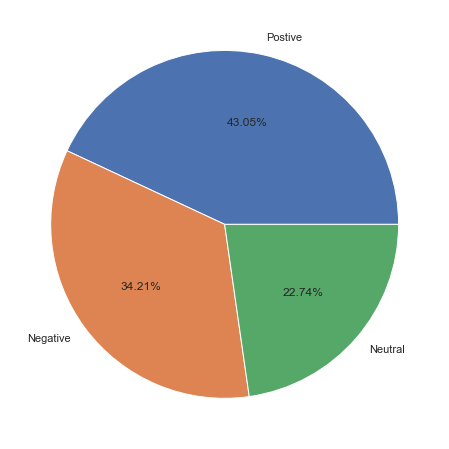

In [265]:
figure( figsize=(8,8))
values=[p/len(data),n/len(data),nt/len(data)]
labels=['Postive','Negative','Neutral']
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.show()

### Distribution of Postive and Negative Tweets.

In [267]:
pl=nl=0
c=0
for i in data2['Sentiment']:
    if i == "POSITIVE":
        pl=pl+data['Likes'][c]
    elif i == "NEGATIVE":
        nl=nl+data['Likes'][c]
    c=c+1
     
tl=sum(data['Likes'])        

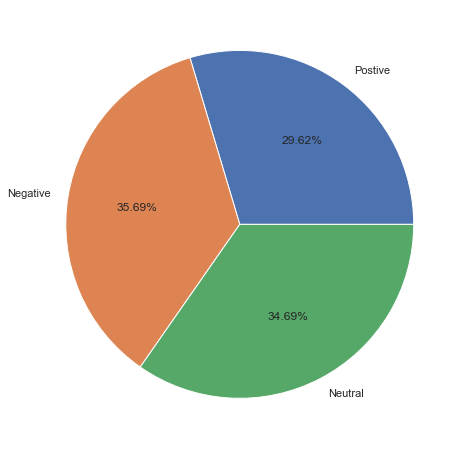

In [268]:
figure( figsize=(8,8))
values=[(pl/tl)*100,(nl/tl)*100,((tl-pl-nl)/tl)*100]
labels=['Postive','Negative','Neutral']
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.show()

### Distrubution of likes received on Tweets. More likes signifies that more people share the same thought with that particular tweet.

In [270]:
c=0
p_tweets=" "
n_tweets=" "
for i in data2['Sentiment']:
    if i =="POSITIVE":
        p_tweets=p_tweets+data['Text'][c]
    elif i == "NEGATIVE":
        n_tweets=n_tweets+data['Text'][c]
    c=c+1

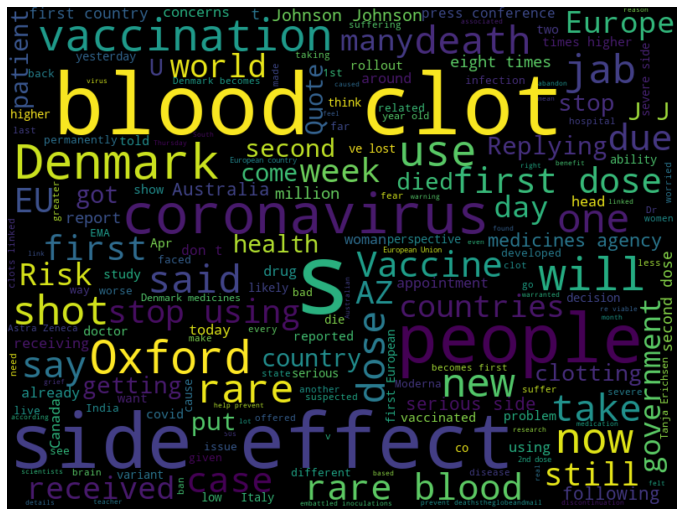

In [271]:
figure( figsize=(12, 10))
wordcloud = WordCloud(height=600,width=800,random_state=21,max_font_size=119).generate(n_tweets)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Main keywords used by people who wrote negative tweets for Astrazeneca

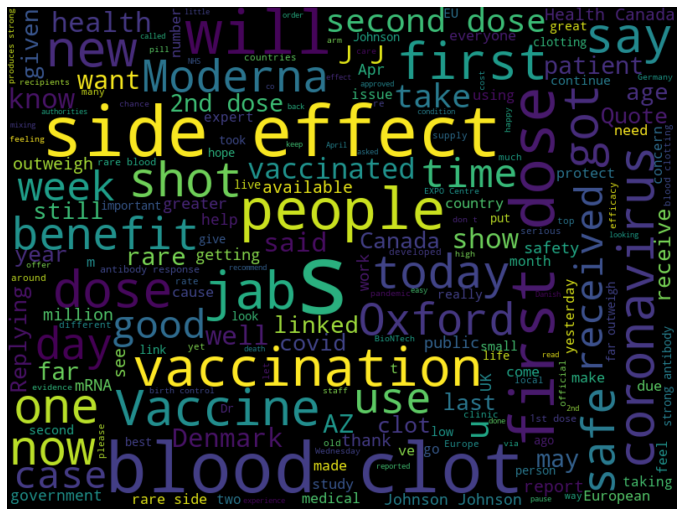

In [277]:
figure( figsize=(12, 10))
wordcloud = WordCloud(height=600,width=800,random_state=21,max_font_size=119).generate(p_tweets)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Main keywords used by people who wrote negative tweets for Astrazeneca
